In [1]:
model_colors =  {
    "RFW": "#1f77b4",          # Blue
    "KNNW": "#ff7f0e",         # Orange
    "DTW": "#2ca02c",          # Green
    "GKW": "#17becf",          # Cyan (new color for GKW)
    "LS_KDEx_LGBM": "#9467bd", # Purple
    "LS_KDEx_MLP": "#8c564b",  # Brown
    "DRF": "#e74c3c",          # Highlighted Red (focused model)
}

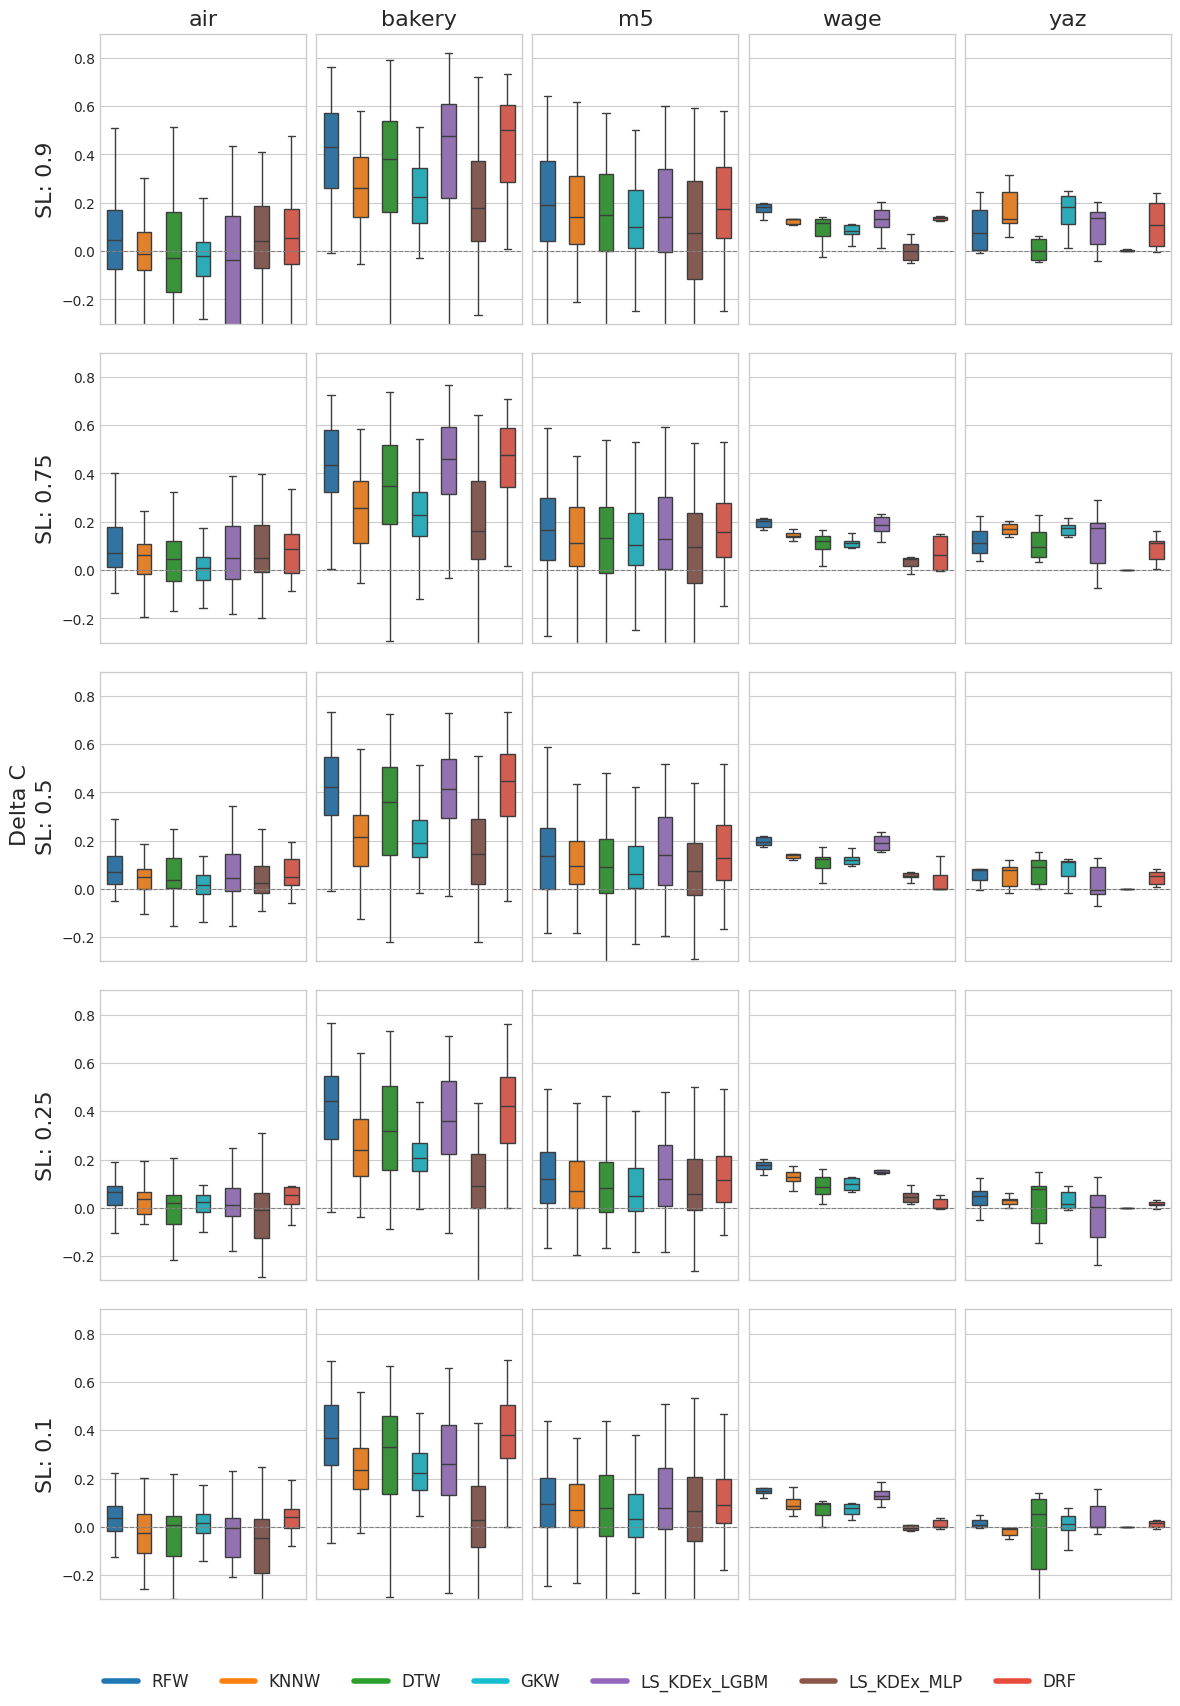

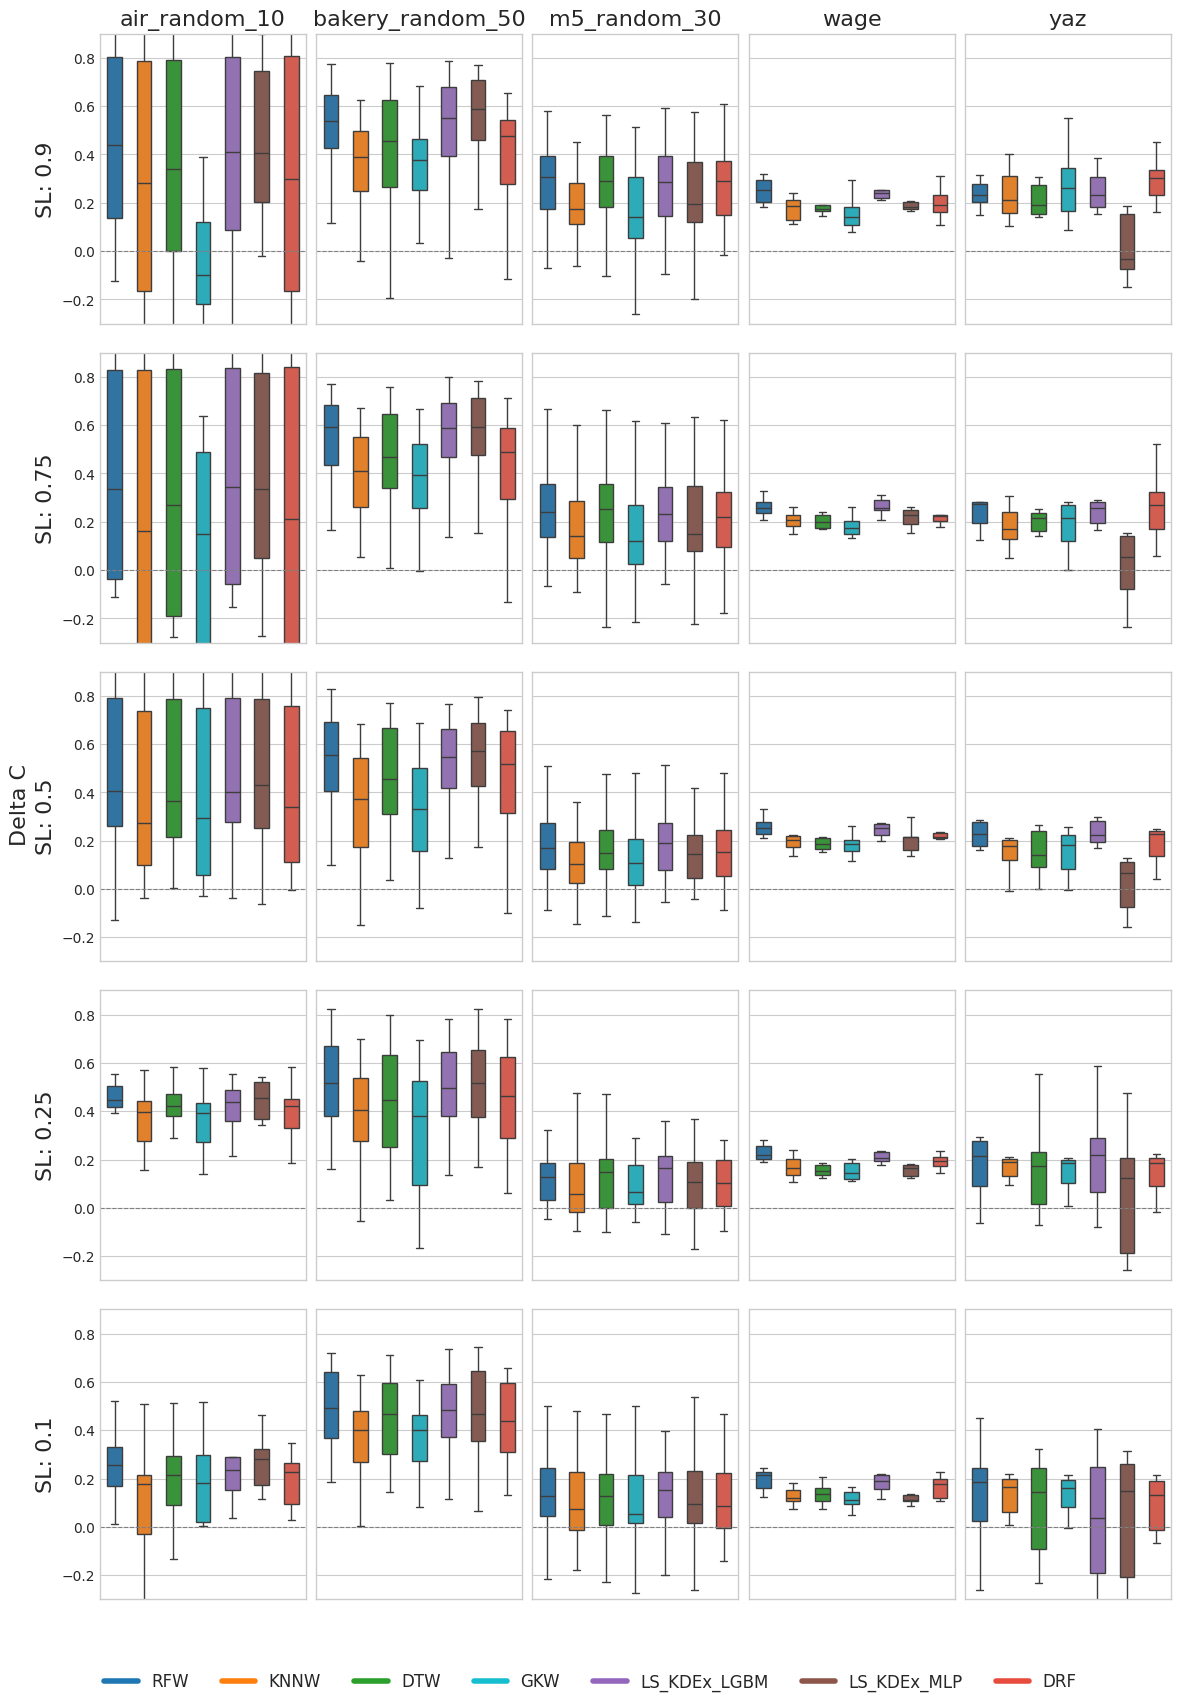

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"
df = pd.read_csv(file_path)

# Exclude specific models
excluded_models = ['SAA', 'MLP', 'LGBM']
filtered_df = df[~df['Model'].isin(excluded_models)]

# Dataset names for both training types
dataset_names = {
    "ID-Based Training": ['air', 'bakery', 'm5', 'wage', 'yaz'],
    "Full Data Training": ['air_random_10', 'bakery_random_50', 'm5_random_30', 'wage', 'yaz']
}

# SL values to consider
sl_values = [0.9, 0.75, 0.5, 0.25, 0.1]

# Extended color palette
model_colors = model_colors

# Unified model order
model_order = ["RFW", "KNNW", "DTW", "GKW", "LS_KDEx_LGBM", "LS_KDEx_MLP", "DRF"]

# Fixed Y-axis ranges
global_y_min = -0.3
global_y_max = 0.9
wage_y_min = -0.1  # Zoomed-in lower bound for wage dataset
wage_y_max = 0.3   # Zoomed-in upper bound for wage dataset

# Iterate over both training types
for training_type, datasets in dataset_names.items():
    num_rows = len(sl_values)
    num_cols = len(datasets)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18), sharex=True, sharey=True)  # Increased height

    for row, sl in enumerate(sl_values):
        for col, dataset in enumerate(datasets):
            ax = axes[row, col]
            # Filter data for the specific dataset, training type, and SL value
            filtered_data = filtered_df[
                (filtered_df['dataset'] == dataset) &
                (filtered_df['training_description'] == training_type) &
                (filtered_df['sl'] == sl)
            ]
            
            sns.boxplot(
                ax=ax, x='Model', y='delta C', data=filtered_data,
                showfliers=False, width=0.5, order=model_order, hue='Model',
                palette=model_colors, dodge=False, legend=False
            )

            # Adjust marker size for points
            for line in ax.lines:
                line.set_markersize(2)

            # Set y-axis range based on dataset
            if dataset == "wage":
                ax.set_ylim(wage_y_min, wage_y_max)  # Zoomed-in range for wage
            else:
                ax.set_ylim(global_y_min, global_y_max)  # Default range for other datasets

            # Add dashed line at y=0
            ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

            # Set dataset title once at the top row
            if row == 0:
                ax.set_title(f'{dataset}', fontsize=16)  # Dataset title
            
            # Add SL description on the y-axis for the leftmost plots
            if col == 0:
                ax.set_ylabel(f'SL: {sl}', fontsize=16)
            else:
                ax.set_ylabel('')

            # Remove "Model" label from the last row
            if row == num_rows - 1:
                ax.set_xlabel('')  # Remove "Model" text from x-axis
            
            # Keep X-axis ticks but remove tick labels
            ax.set_xticks(range(len(model_order)))  # Ensure ticks are present
            ax.set_xticklabels([])  # Remove tick labels

    # Add a global Y-axis label for all plots
    fig.supylabel('Delta C', fontsize=16)

    # Add a legend below the plots
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in model_colors.values()]
    labels = model_colors.keys()
    fig.legend(handles, labels, loc='lower center', ncol=len(model_colors), fontsize=12, frameon=False)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Reduced space between legend and plots
    plt.subplots_adjust(wspace=0.05, hspace=0.1)  # Increased spacing between plots
    plt.show()



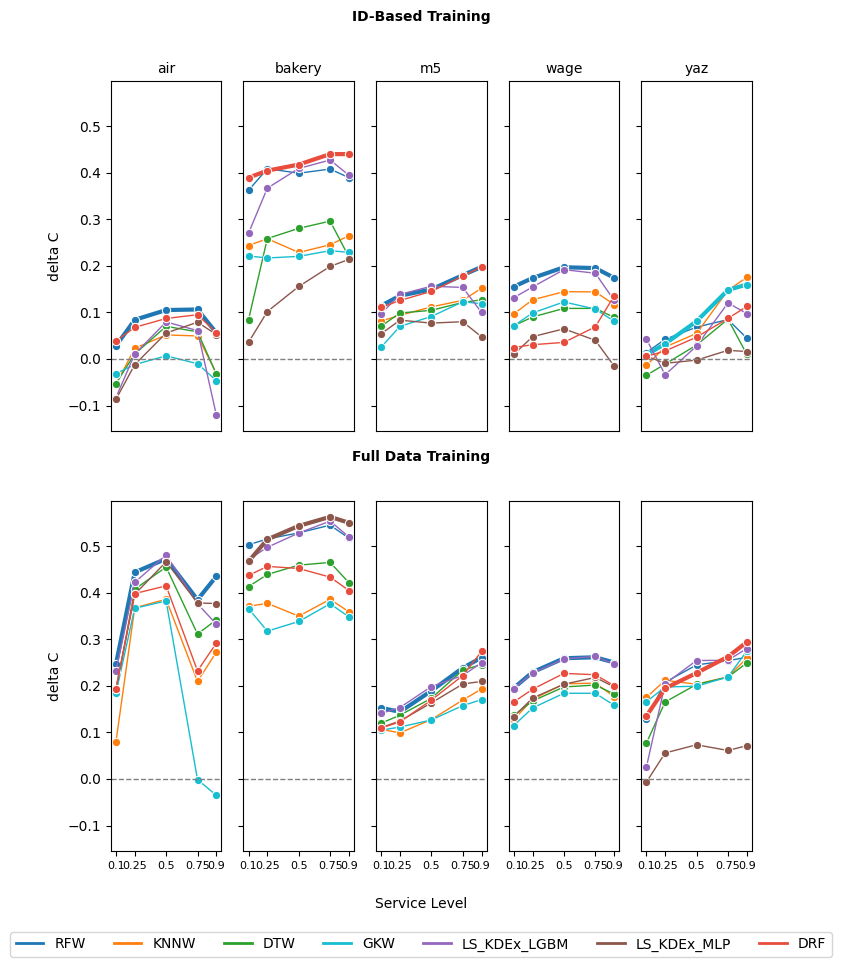

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pfad zur Datei
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"

# CSV-Datei laden
df = pd.read_csv(file_path)

# Modelle ausschließen (Filterung vor der Schleife)
excluded_models = ['SAA', 'MLP', 'LGBM']
filtered_df = df[~df['Model'].isin(excluded_models)]

# Datensätze für beide Training-Typen
dataset_names = {
    "ID-Based Training": ['air', 'bakery', 'm5', 'wage', 'yaz'],
    "Full Data Training": ['air_random_10', 'bakery_random_50', 'm5_random_30', 'wage', 'yaz']
}

# Erweiterte Farbpalette
model_colors = model_colors
# Einheitliche Modellreihenfolge
model_order = ["RFW", "KNNW", "DTW", "GKW", "LS_KDEx_LGBM", "LS_KDEx_MLP", "DRF"]

# Erstelle die Subplots
fig, axes = plt.subplots(2, len(dataset_names["ID-Based Training"]), figsize=(8.27, 10), sharey=True)

for row, (training_type, datasets) in enumerate(dataset_names.items()):
    for col, dataset in enumerate(datasets):
        ax = axes[row, col]
        # Filter für spezifisches Dataset und Training-Typ
        filtered_data = filtered_df[
            (filtered_df['dataset'] == dataset) & 
            (filtered_df['training_description'] == training_type)
        ]

        # Bestes Modell für das aktuelle Dataset basierend auf dem Durchschnitt von delta C
        best_model = filtered_data.groupby('Model')['delta C'].mean().idxmax()

        # Linienplot für alle Modelle
        for model in model_order:
            model_data = filtered_data[filtered_data['Model'] == model]
            sns.lineplot(
                ax=ax, data=model_data, x='sl', y='delta C', label=model,
                color=model_colors[model], marker='o', linewidth=3 if model == best_model else 1,
                errorbar=None
            )

        # Füge gestrichelte Linie bei y=0 hinzu
        ax.axhline(0, color='gray', linestyle='--', linewidth=1)

        # Setze Titel in der oberen Zeile
        if row == 0:
            ax.set_title(f'{dataset}', fontsize=10)

        # Entferne X-Achsenbeschriftung und Ticks für die obere Zeile
        if row == 0:
            ax.set_xticks([])  # Entfernt die X-Achsen-Ticks
            ax.set_xlabel('')  # Entfernt "sl"

        # Setze die X-Achsenpunkte auf spezifische Werte für die untere Zeile, entferne "sl"
        if row == 1:
            ax.set_xticks([0.1, 0.25, 0.5, 0.75, 0.9])
            ax.set_xticklabels(['0.1', '0.25', '0.5', '0.75', '0.9'], fontsize=8)  # Nur Zahlenwerte
            ax.set_xlabel('')  # Entfernt "sl"
        # Entferne die Legende von den Subplots
        ax.get_legend().remove()

# Globale Legende unterhalb der Grafik
handles = [plt.Line2D([0], [0], color=color, lw=2, label=model) for model, color in model_colors.items()]
fig.legend(handles, model_colors.keys(), loc='lower center', ncol=len(model_colors), fontsize=10, frameon=True)

# Passen Sie den Abstand zwischen den Subplots an
plt.subplots_adjust(hspace=0.2)  # Abstand zwischen den beiden Plot-Reihen

# Untertitel für beide Plots
plt.figtext(0.5, 0.94, 'ID-Based Training', ha='center', fontsize=10, weight='bold')  # Erster Untertitel
plt.figtext(0.5, 0.5, 'Full Data Training', ha='center', fontsize=10, weight='bold')  # Zweiter Untertitel, direkt über dem unteren Plot

# Gemeinsame X-Achsenbeschriftung
fig.supxlabel('Service Level', fontsize=10, y=0.05)  # Position leicht oberhalb der Legende

plt.show()


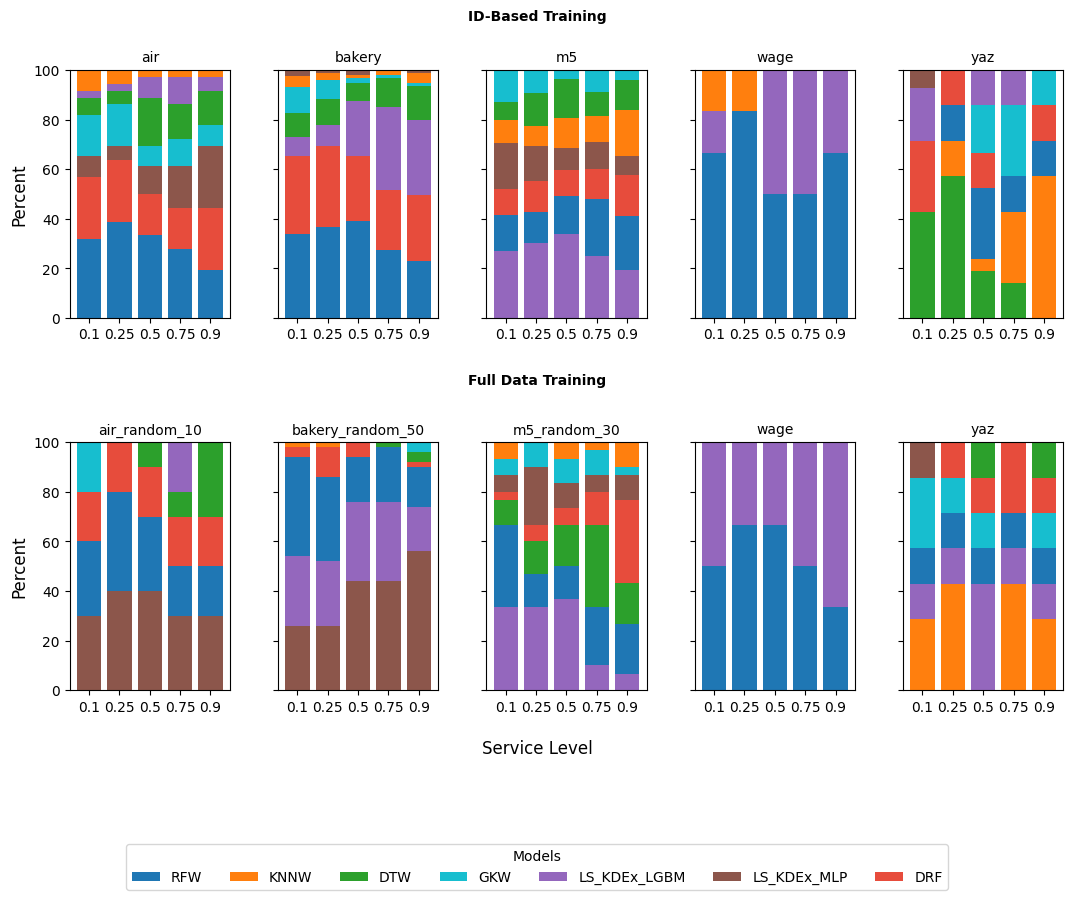

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Ihre bereitgestellte model_colors-Palette
model_colors =  {
    "RFW": "#1f77b4",          # Blue
    "KNNW": "#ff7f0e",         # Orange
    "DTW": "#2ca02c",          # Green
    "GKW": "#17becf",          # Cyan (new color for GKW)
    "LS_KDEx_LGBM": "#9467bd", # Purple
    "LS_KDEx_MLP": "#8c564b",  # Brown
    "DRF": "#e74c3c",          # Highlighted Red (focused model)
}

# Pfad zur CSV-Datei
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"

# Laden der CSV-Datei mit Fehlerbehandlung
try:
    df = pd.read_csv(file_path)
except Exception as e:
    raise SystemExit(f"Fehler beim Laden der CSV-Datei: {e}")

# Überprüfen der Spalten in der CSV-Datei
expected_columns = {'Model', 'training_description', 'dataset', 'sl', 'Variable', 'Pinball Loss'}
if not expected_columns.issubset(df.columns):
    raise SystemExit(f"Fehlende erwartete Spalten. Erwartet: {expected_columns}, Gefunden: {df.columns}")

# Ausschließen bestimmter Modelle
excluded_models = ['SAA', 'MLP', 'LGBM']
filtered_df = df[~df['Model'].isin(excluded_models)]

# Überprüfen der verbleibenden Modelle
remaining_models = filtered_df['Model'].unique()

# Sicherstellen, dass alle verbleibenden Modelle in model_colors definiert sind
for model in remaining_models:
    if model not in model_colors:
        model_colors[model] = 'gray'  # Standardfarbe für nicht definierte Modelle

# Einzigartige Trainingsbeschreibungen
training_descriptions = filtered_df['training_description'].unique()

# Bestimmen der maximalen Anzahl an Datasets pro Trainingsbeschreibung
datasets_per_training = [filtered_df[filtered_df['training_description'] == td]['dataset'].nunique() for td in training_descriptions]
max_datasets = max(datasets_per_training) if datasets_per_training else 0

# Bestimmen der Anzahl der Trainingsbeschreibungen
num_trainings = len(training_descriptions)

# Erstellen einer einzigen Figur mit mehreren Subplots
# Layout: nrows = Anzahl der Trainingsbeschreibungen, ncols = maximale Anzahl der Datasets
# Optimierung für DIN A4: 11.69 x 8.27 inches
fig_width = 11.69
fig_height = 8.27
fig, axes = plt.subplots(nrows=num_trainings, ncols=max_datasets, figsize=(fig_width, fig_height), sharey=True)

# Sicherstellen, dass axes immer ein 2D-Array ist
if num_trainings == 1 and max_datasets == 1:
    axes = np.array([[axes]])
elif num_trainings == 1:
    axes = axes.reshape(1, max_datasets)
elif max_datasets == 1:
    axes = axes.reshape(num_trainings, 1)

# Loop über jede Trainingsbeschreibung
for row_idx, td in enumerate(training_descriptions):
    td_df = filtered_df[filtered_df['training_description'] == td]
    datasets = td_df['dataset'].unique()
    num_datasets = len(datasets)

    for col_idx in range(max_datasets):
        ax = axes[row_idx, col_idx]
        ax.set_title("")

        if col_idx < num_datasets:
            dataset = datasets[col_idx]
            dataset_df = td_df[td_df['dataset'] == dataset]
            service_levels = sorted(dataset_df['sl'].unique())
            variables = dataset_df['Variable'].unique()

            if len(service_levels) == 0 or len(variables) == 0:
                ax.set_visible(False)
                continue

            # Initialisieren eines Dictionaries zur Speicherung der besten Modellanzahlen pro Service Level
            best_model_counts_per_sl = {}
            for sl in service_levels:
                sl_df = dataset_df[dataset_df['sl'] == sl]
                # Initialisieren eines Dictionaries zur Zählung der besten Modelle
                best_model_counts = {model: 0 for model in model_colors.keys()}
                # Loop über jede Variable
                for var in variables:
                    var_df = sl_df[sl_df['Variable'] == var]
                    # Finden des Modells mit dem niedrigsten Pinball Loss
                    if not var_df.empty:
                        min_loss = var_df['Pinball Loss'].min()
                        best_models = var_df[var_df['Pinball Loss'] == min_loss]['Model'].unique()
                        # Bei Gleichstand den Count aufteilen
                        count_increment = 1.0 / len(best_models)
                        for bm in best_models:
                            if bm in best_model_counts:
                                best_model_counts[bm] += count_increment
                # Umwandeln der Counts in Prozentsätze
                total_vars = len(variables)
                for model in best_model_counts:
                    best_model_counts[model] = (best_model_counts[model] / total_vars) * 100
                best_model_counts_per_sl[sl] = best_model_counts

            # Berechnung der Gesamtprozentsätze pro Modell für dieses Dataset
            total_percentages = {model: 0 for model in model_colors.keys()}
            for sl in service_levels:
                for model, perc in best_model_counts_per_sl[sl].items():
                    total_percentages[model] += perc

            # Sortieren der Modelle basierend auf den Gesamtprozentsätzen in absteigender Reihenfolge
            sorted_models = sorted(total_percentages.keys(), key=lambda m: total_percentages[m], reverse=True)

            # Plotten des gestapelten Balkendiagramms für dieses Dataset
            x = np.arange(len(service_levels))  # Positionen auf der x-Achse
            bottoms = np.zeros(len(service_levels))

            # Plotten der Balken in der sortierten Reihenfolge
            for model in sorted_models:
                percentages = [best_model_counts_per_sl[sl][model] for sl in service_levels]
                ax.bar(
                    x,
                    percentages,
                    bottom=bottoms,
                    color=model_colors.get(model, 'gray'),  # Farben immer aus model_colors
                    label=model if (row_idx == 0 and col_idx == 0) else ""  # Nur einmal Label für Legende
                )
                bottoms += percentages

            ax.set_xticks(x)
            ax.set_xticklabels([str(sl) for sl in service_levels])  # Nur den Wert anzeigen
            if col_idx == 0:
                ax.set_ylabel('Percent', fontsize=12)
            ax.set_title(f"{dataset}", fontsize=10)
        else:
            ax.set_visible(False)

# Hinzufügen einer gemeinsamen X-Achsen-Beschriftung
plt.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.95, hspace=0.4, wspace=0.3)
fig.text(0.5, 0.08, 'Service Level', ha='center', va='center', fontsize=12)

# Hinzufügen einer gemeinsamen Legende
handles = [Patch(facecolor=model_colors[model], label=model) for model in model_colors.keys()]
fig.legend(
    handles,
    [model for model in model_colors.keys()],
    title='Models',
    bbox_to_anchor=(0.5, -0.1),  # Position unterhalb der X-Achsen-Beschriftung
    loc='lower center',
    ncol=len(model_colors),
    fontsize=10
)
plt.figtext(0.5, 0.96, 'ID-Based Training', ha='center', fontsize=10, weight='bold')  # Oberer Untertitel
plt.figtext(0.5, 0.52, 'Full Data Training', ha='center', fontsize=10, weight='bold')  # Unterer Untertitel

# Abstand zwischen den Subplots erhöhen
plt.subplots_adjust(hspace=0.5)  # Erhöht den vertikalen Abstand

# Anzeigen des Plots
plt.show()



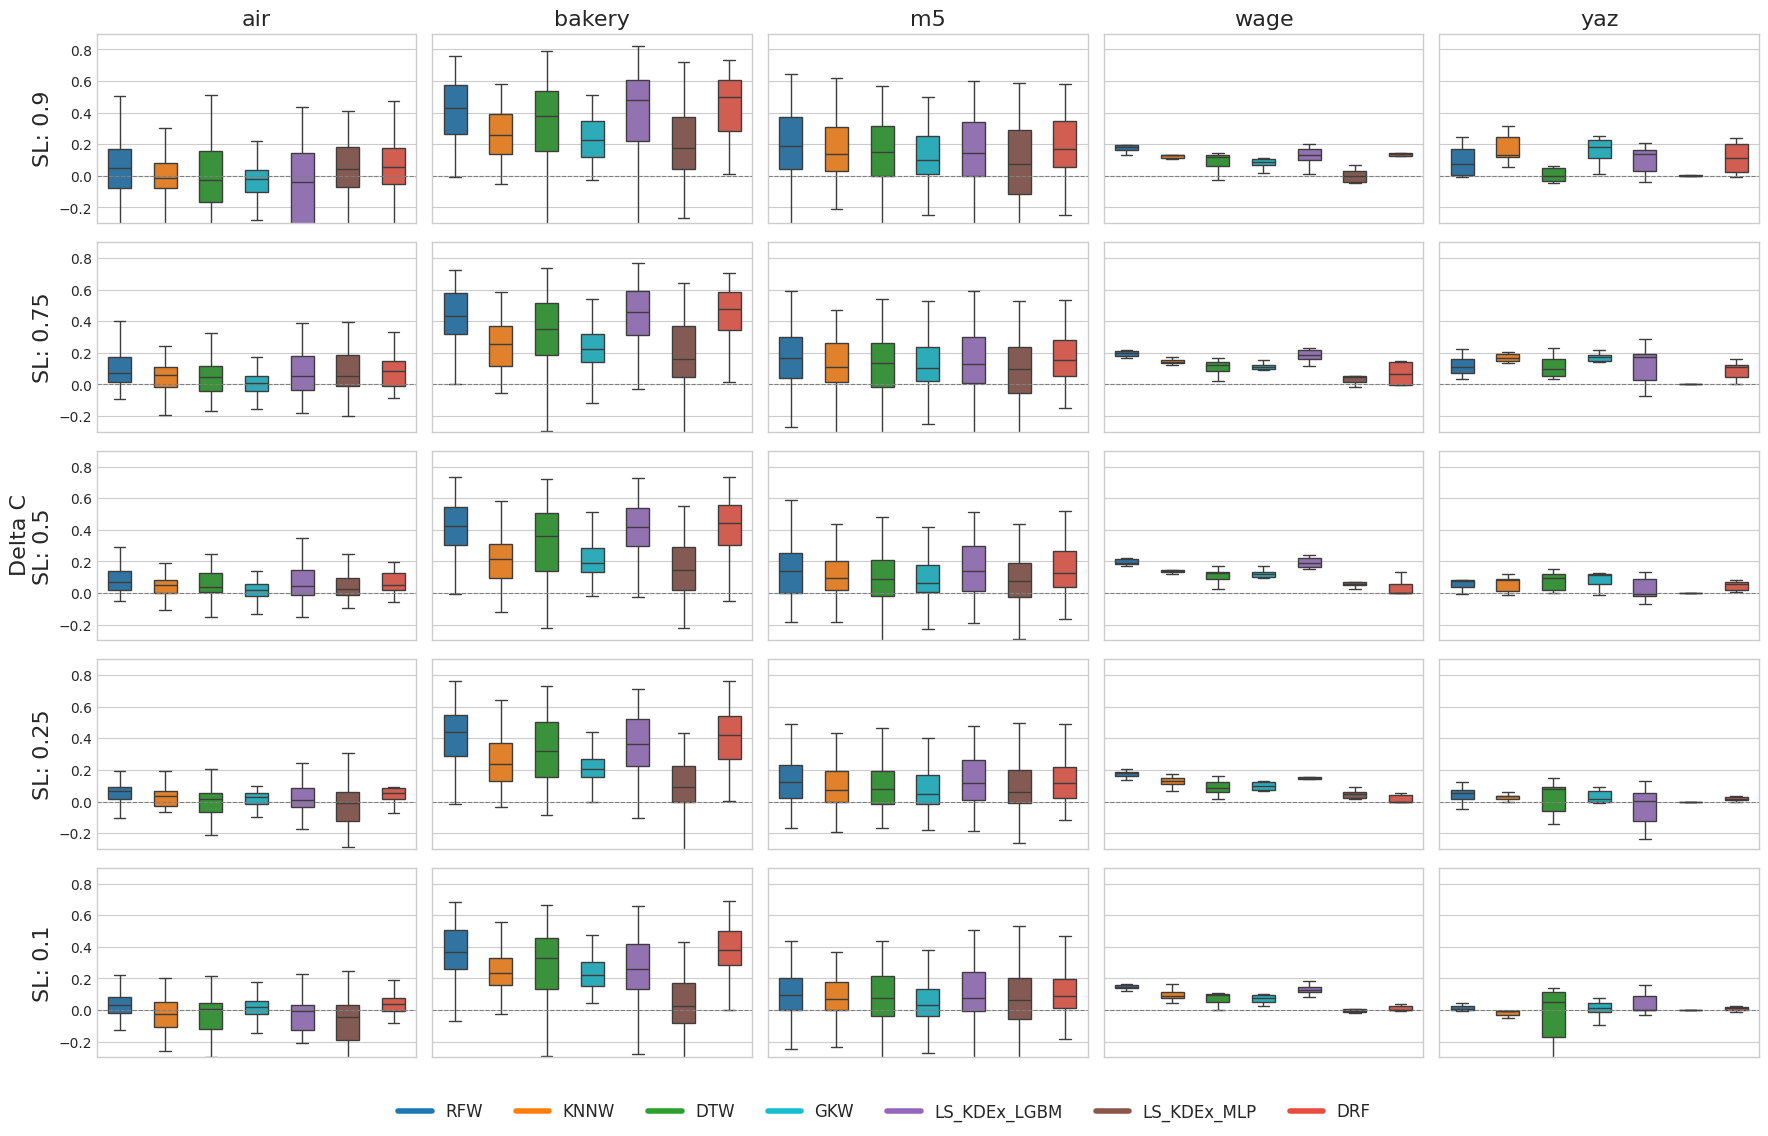

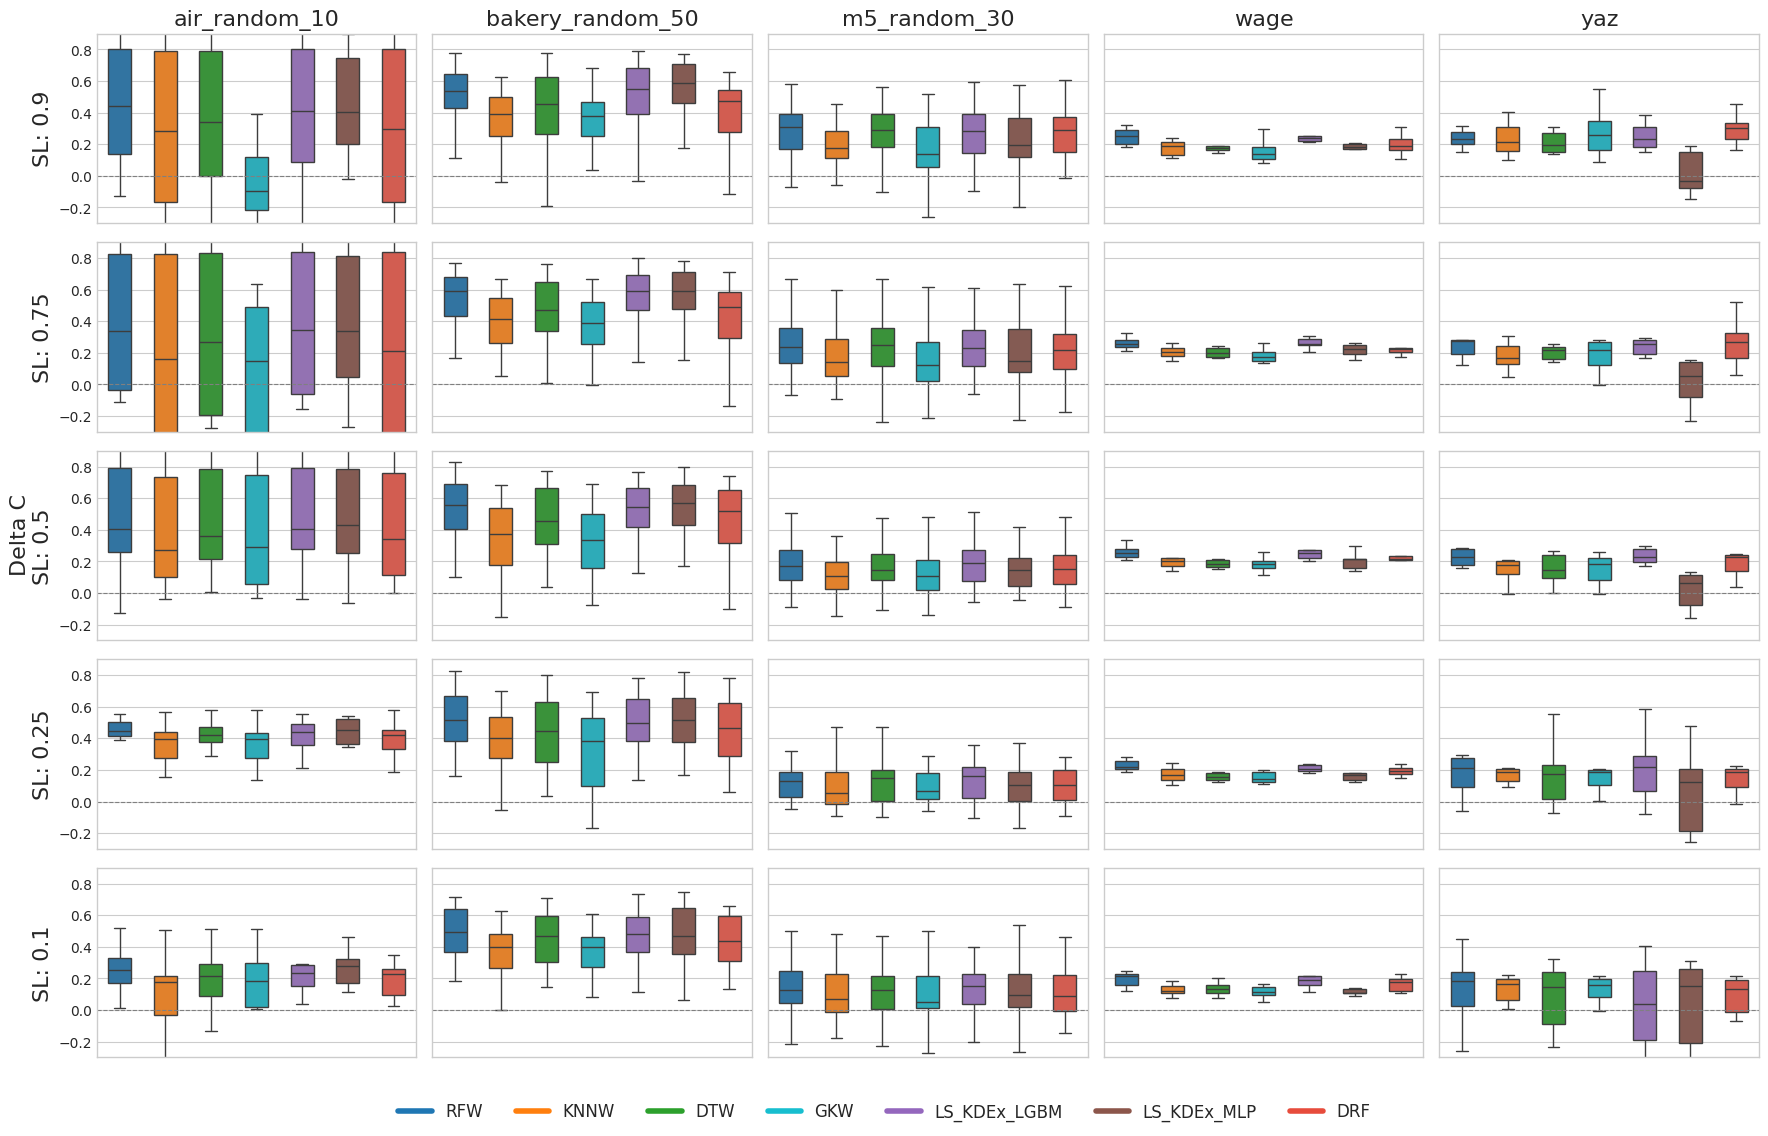

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"
df = pd.read_csv(file_path)

# Exclude specific models
excluded_models = ['SAA', 'MLP', 'LGBM']
filtered_df = df[~df['Model'].isin(excluded_models)]

# Dataset names for both training types
dataset_names = {
    "ID-Based Training": ['air', 'bakery', 'm5', 'wage', 'yaz'],
    "Full Data Training": ['air_random_10', 'bakery_random_50', 'm5_random_30', 'wage', 'yaz']
}

# SL values to consider
sl_values = [0.9, 0.75, 0.5, 0.25, 0.1]

# Extended color palette
model_colors = model_colors

# Unified model order
model_order = ["RFW", "KNNW", "DTW", "GKW", "LS_KDEx_LGBM", "LS_KDEx_MLP", "DRF"]

# Fixed Y-axis ranges
global_y_min = -0.3
global_y_max = 0.9
wage_y_min = -0.1  # Zoomed-in lower bound for wage dataset
wage_y_max = 0.3   # Zoomed-in upper bound for wage dataset

# Iterate over both training types
for training_type, datasets in dataset_names.items():
    num_rows = len(sl_values)
    num_cols = len(datasets)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12), sharex=True, sharey=True)  # Increased height

    for row, sl in enumerate(sl_values):
        for col, dataset in enumerate(datasets):
            ax = axes[row, col]
            # Filter data for the specific dataset, training type, and SL value
            filtered_data = filtered_df[
                (filtered_df['dataset'] == dataset) &
                (filtered_df['training_description'] == training_type) &
                (filtered_df['sl'] == sl)
            ]
            
            sns.boxplot(
                ax=ax, x='Model', y='delta C', data=filtered_data,
                showfliers=False, width=0.5, order=model_order, hue='Model',
                palette=model_colors, dodge=False, legend=False
            )

            # Adjust marker size for points
            for line in ax.lines:
                line.set_markersize(2)

            # Set y-axis range based on dataset
            if dataset == "wage":
                ax.set_ylim(wage_y_min, wage_y_max)  # Zoomed-in range for wage
            else:
                ax.set_ylim(global_y_min, global_y_max)  # Default range for other datasets

            # Add dashed line at y=0
            ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

            # Set dataset title once at the top row
            if row == 0:
                ax.set_title(f'{dataset}', fontsize=16)  # Dataset title
            
            # Add SL description on the y-axis for the leftmost plots
            if col == 0:
                ax.set_ylabel(f'SL: {sl}', fontsize=16)
            else:
                ax.set_ylabel('')

            # Remove "Model" label from the last row
            if row == num_rows - 1:
                ax.set_xlabel('')  # Remove "Model" text from x-axis
            
            # Keep X-axis ticks but remove tick labels
            ax.set_xticks(range(len(model_order)))  # Ensure ticks are present
            ax.set_xticklabels([])  # Remove tick labels

    # Add a global Y-axis label for all plots
    fig.supylabel('Delta C', fontsize=16)

    # Add a legend below the plots
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in model_colors.values()]
    labels = model_colors.keys()
    fig.legend(handles, labels, loc='lower center', ncol=len(model_colors), fontsize=12, frameon=False)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Reduced space between legend and plots
    plt.subplots_adjust(wspace=0.05, hspace=0.1)  # Increased spacing between plots
    plt.show()

In [5]:
# Pfad zur CSV-Datei
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/crossValidation_results_allDatasets.csv"

# Laden der CSV-Datei mit Fehlerbehandlung
try:
    df = pd.read_csv(file_path)
except Exception as e:
    raise SystemExit(f"Fehler beim Laden der CSV-Datei: {e}")

# Ausschließen bestimmter Modelle
excluded_models = ['MLP', 'LGBM']
filtered_df = df[~df['model_name'].isin(excluded_models)]

df = filtered_df

/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


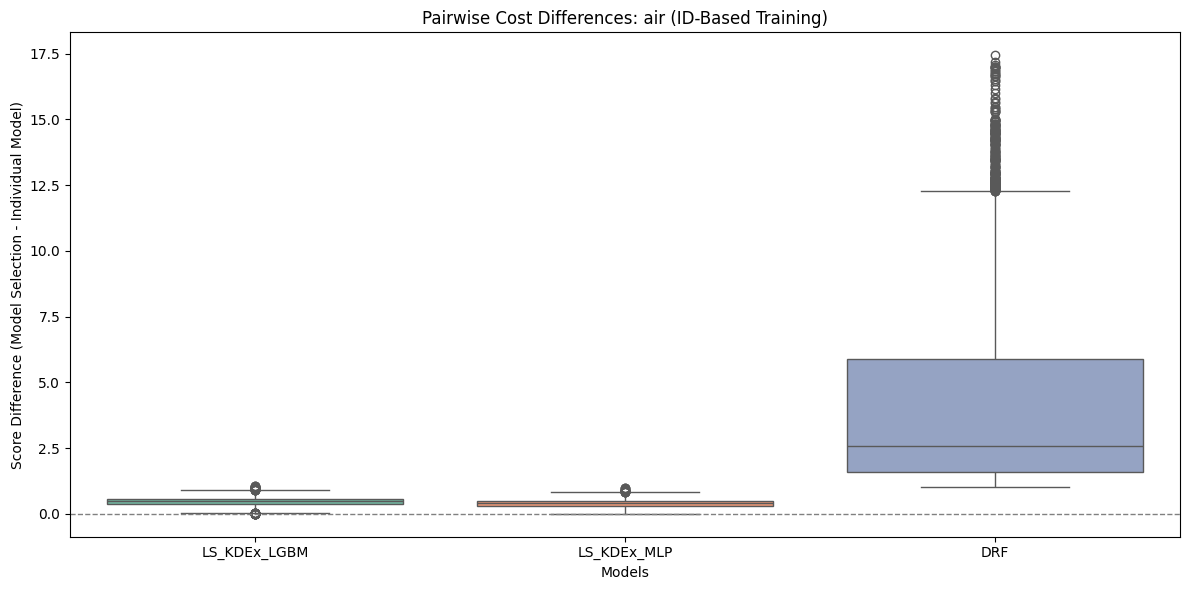

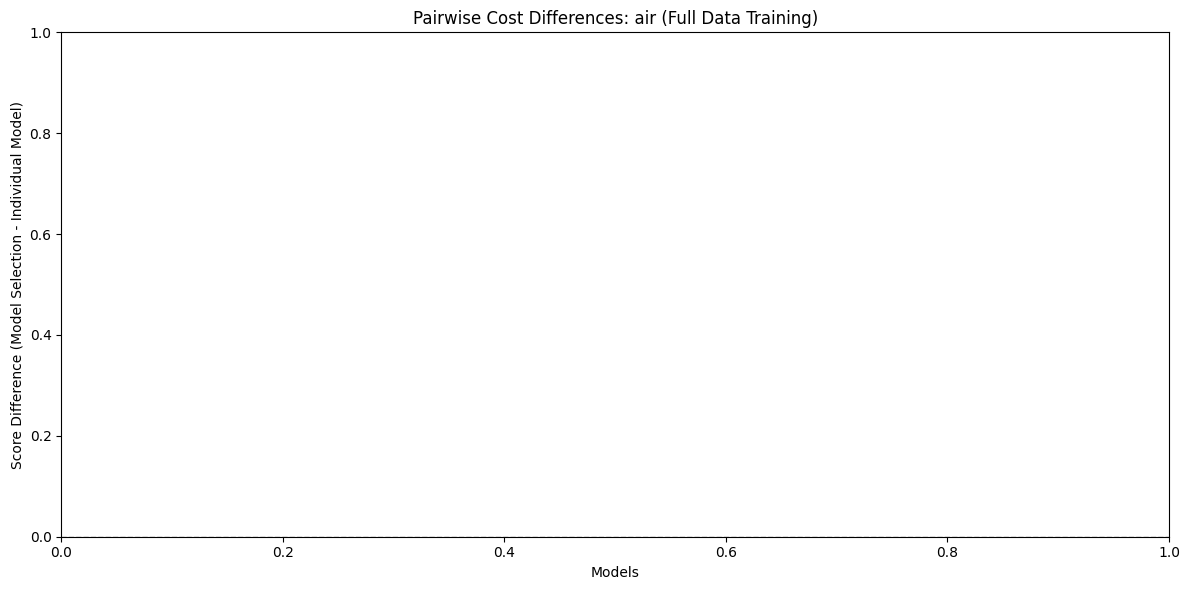

/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


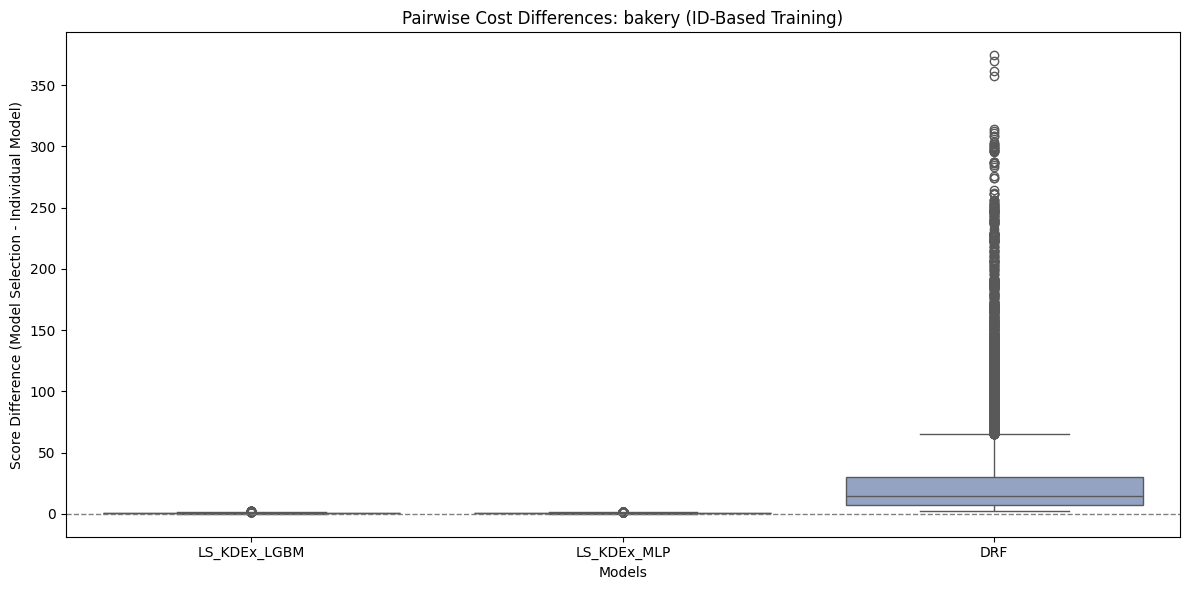

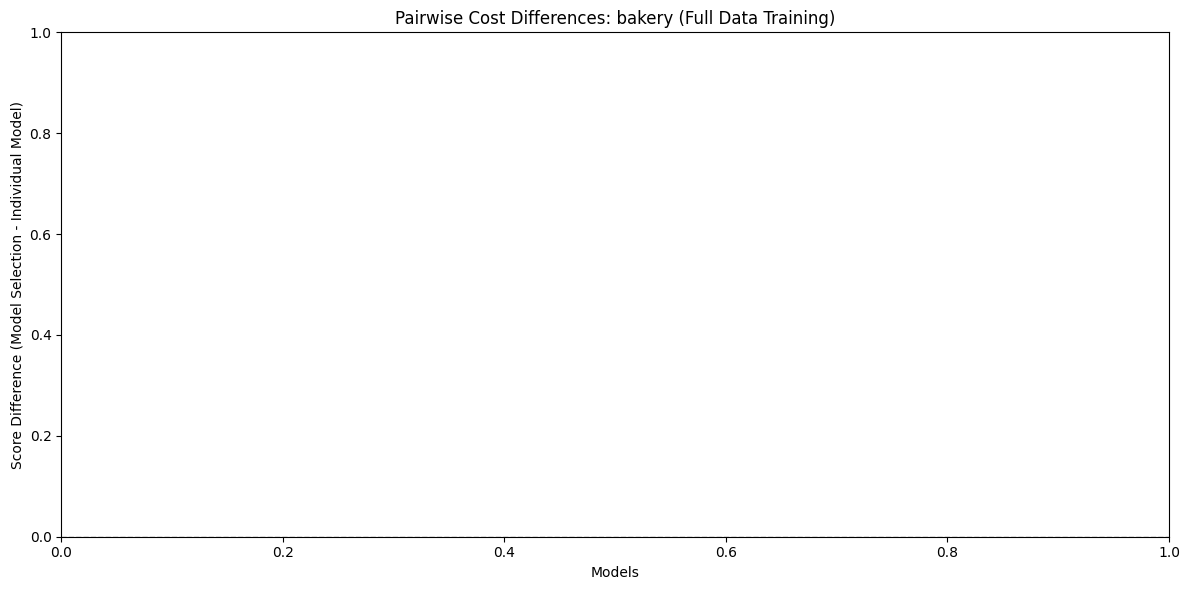

/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


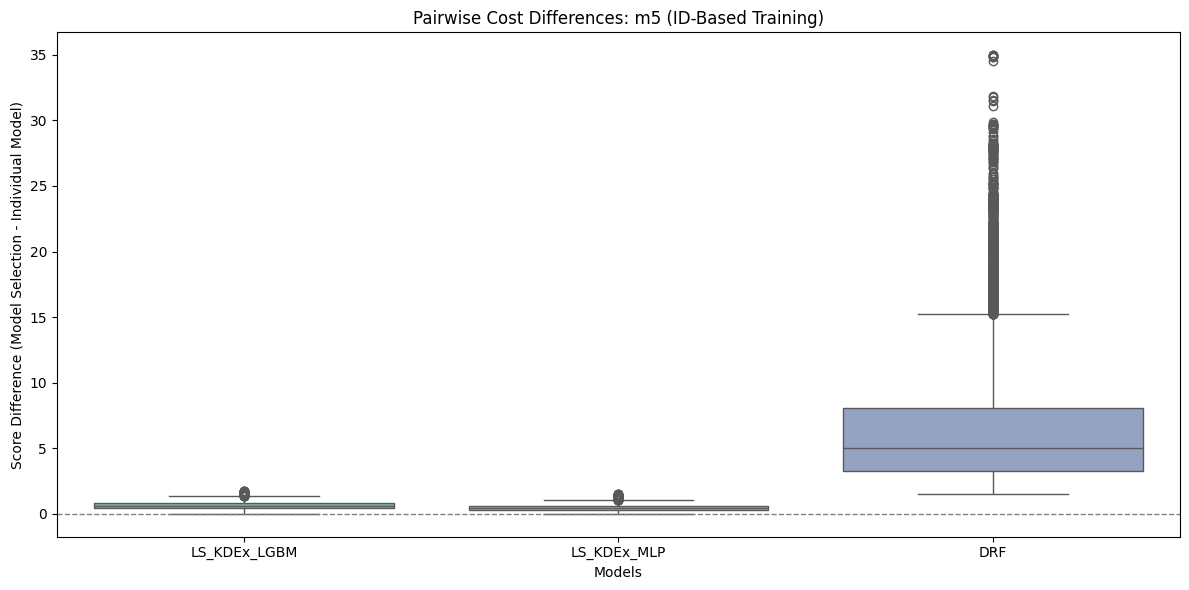

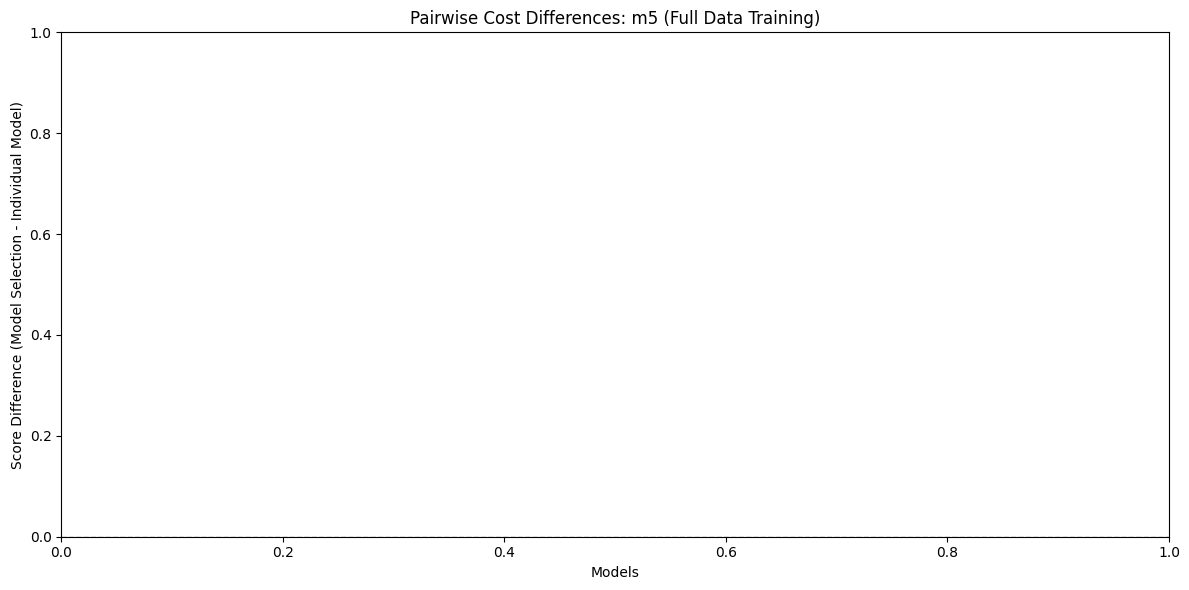

/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


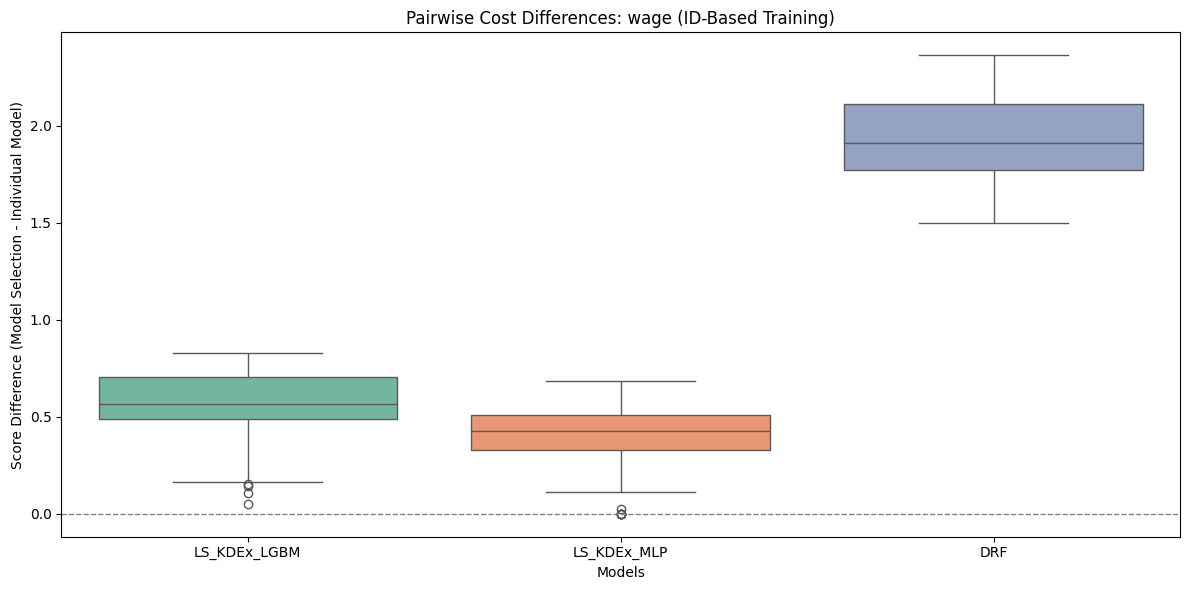

/workspaces/Masterthesis-DRF/venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


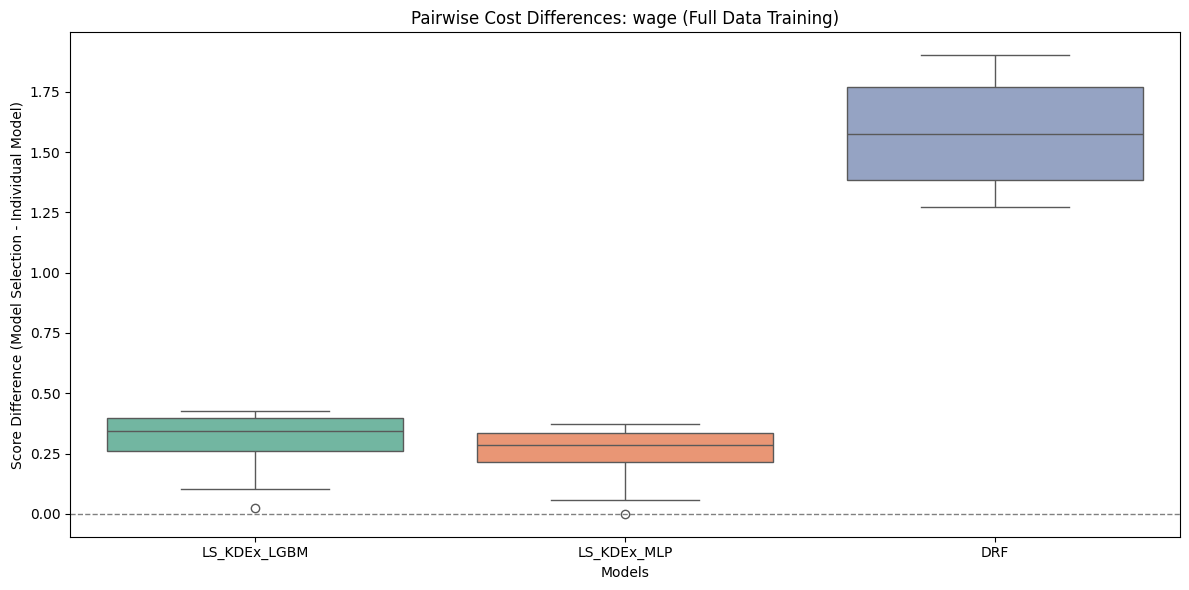

/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


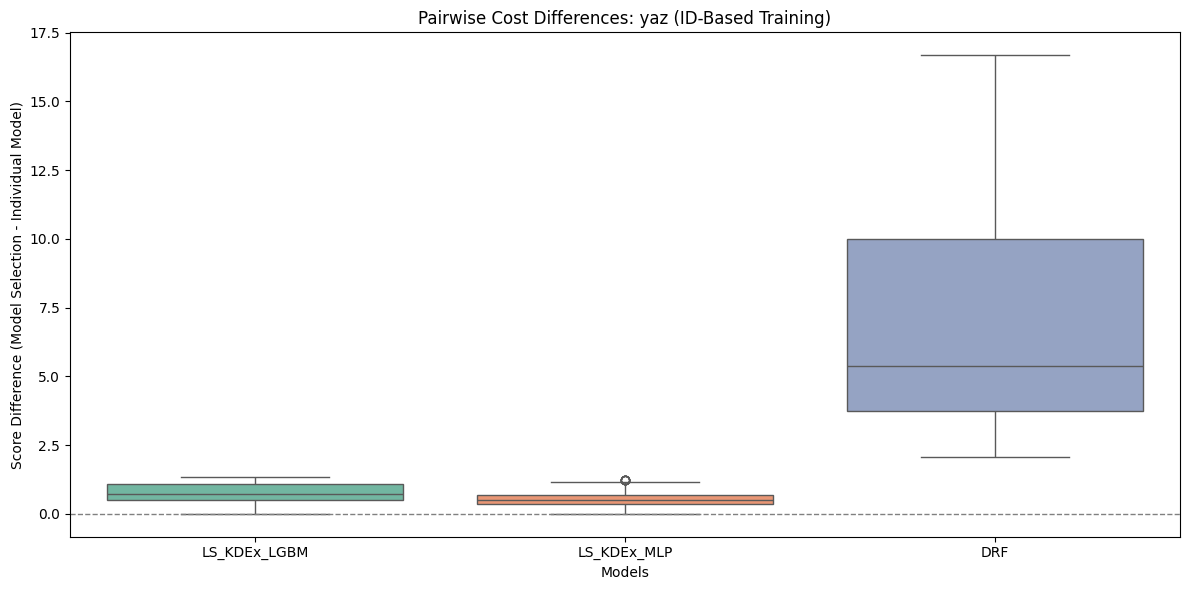

/workspaces/Masterthesis-DRF/venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


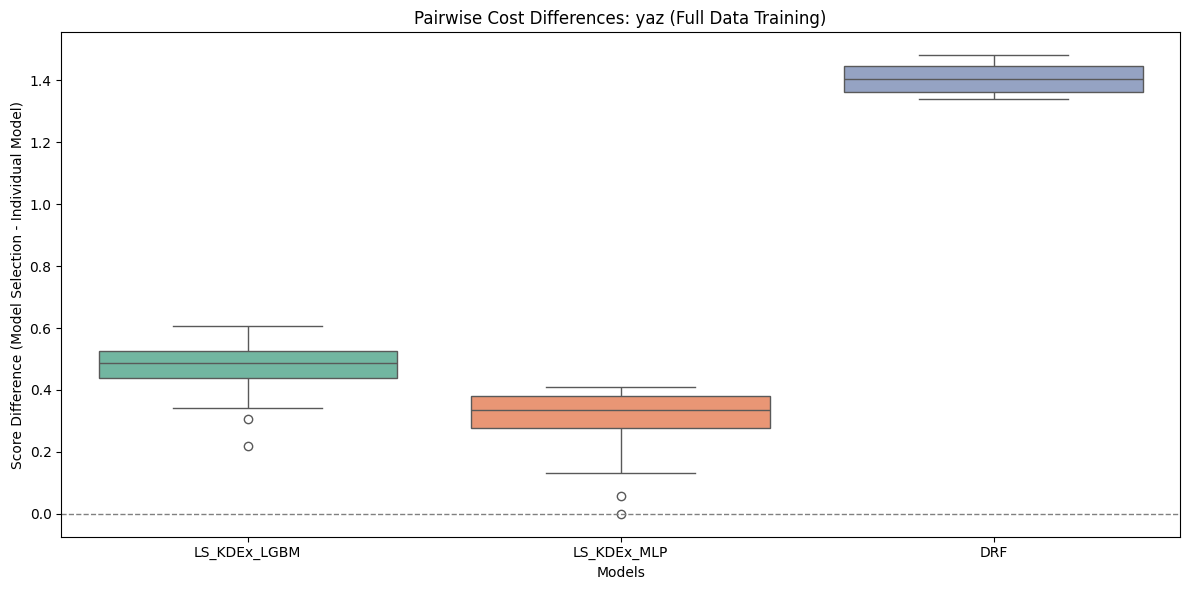

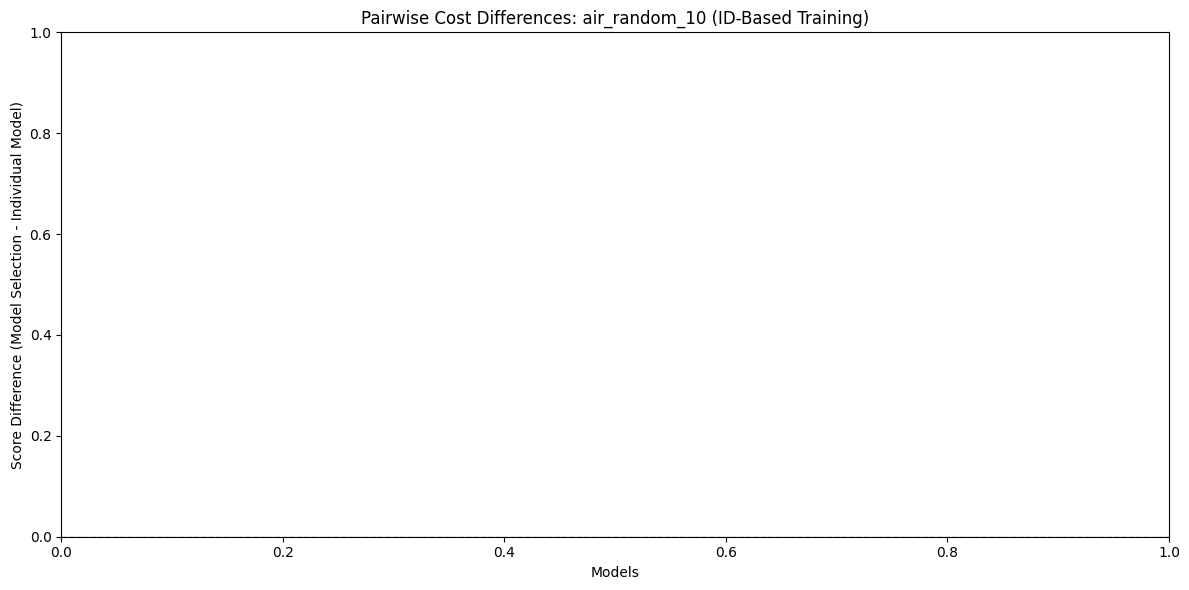

/workspaces/Masterthesis-DRF/venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


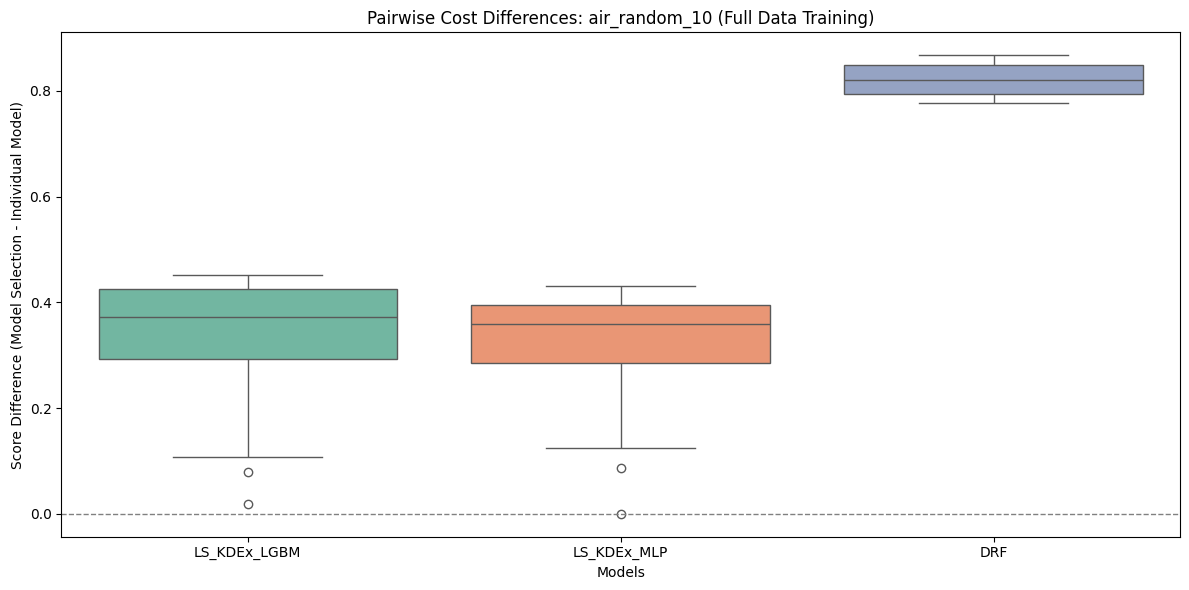

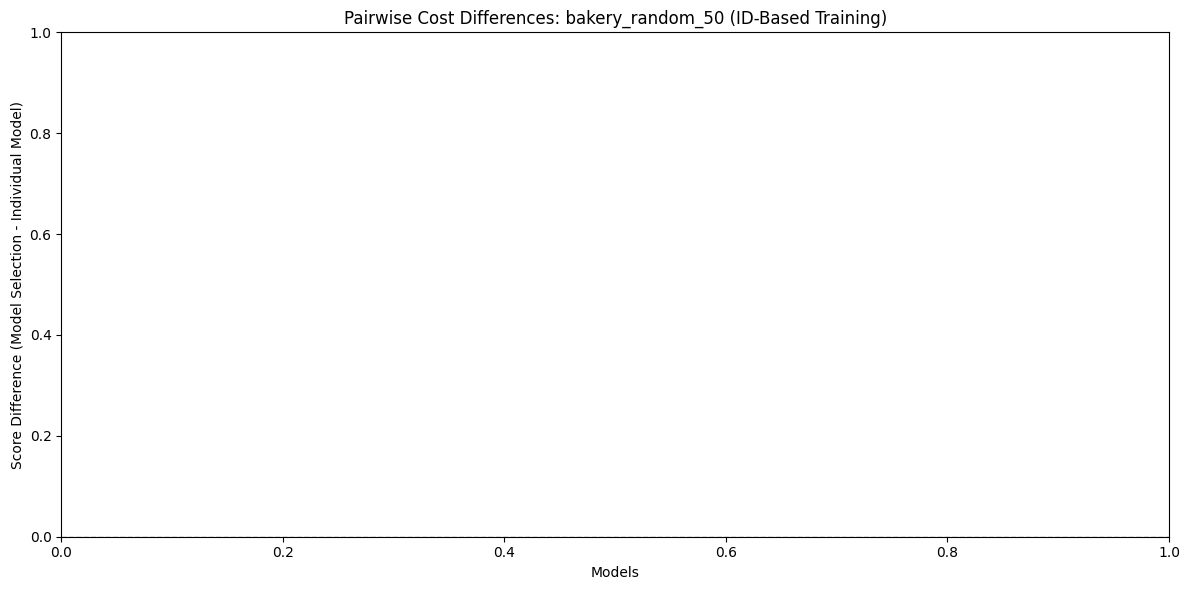

/workspaces/Masterthesis-DRF/venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


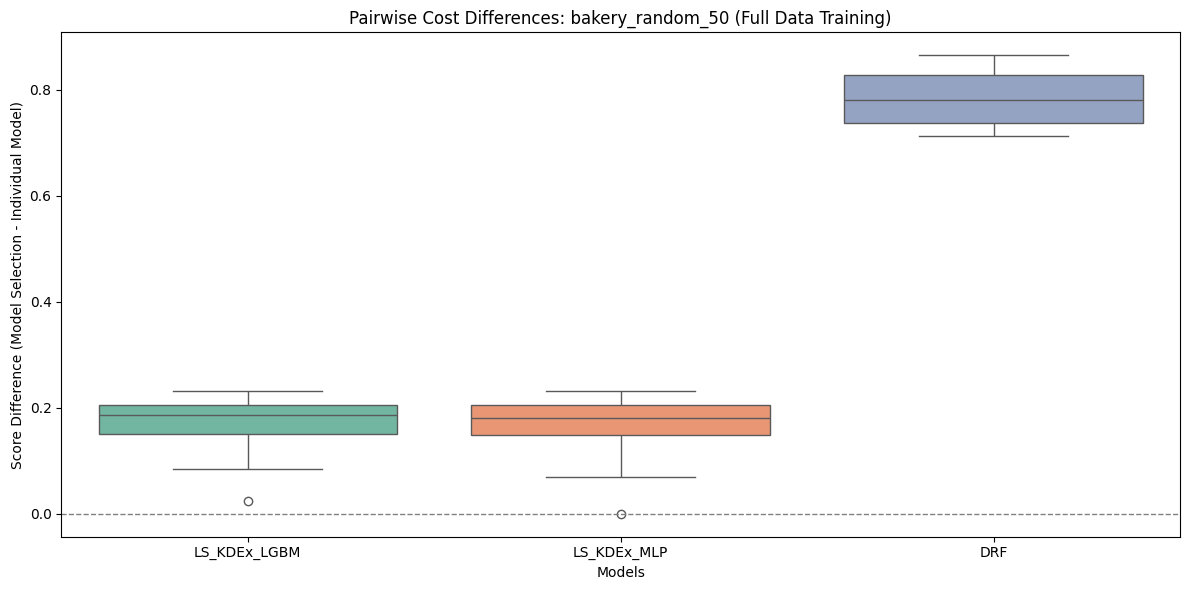

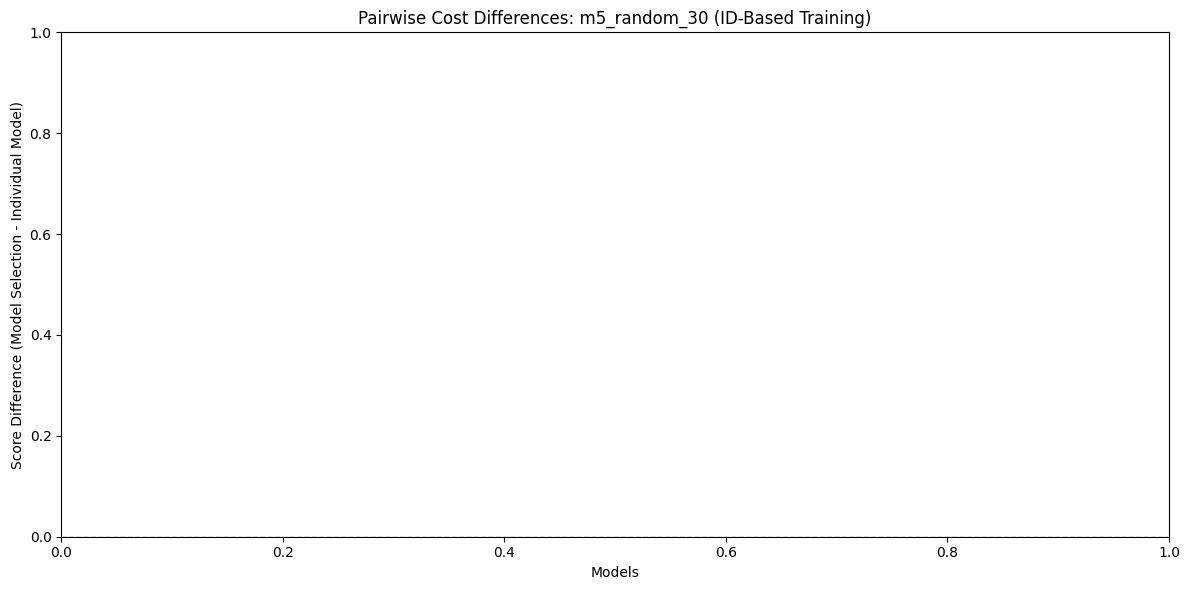

/workspaces/Masterthesis-DRF/venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/tmp/ipykernel_2373/2929719735.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")


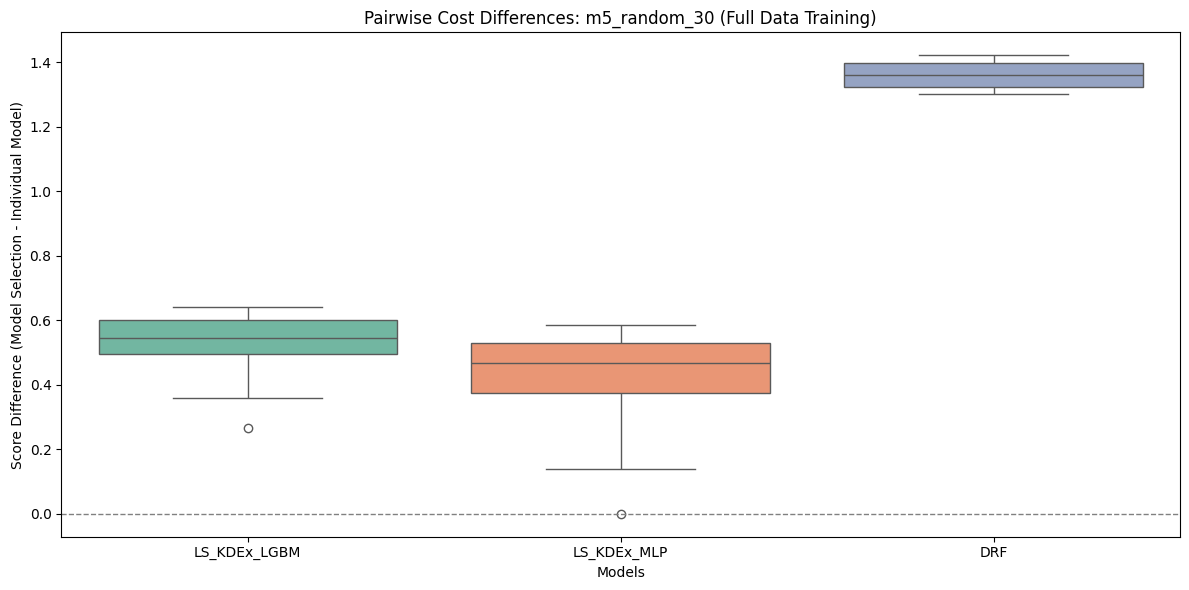

             dataset training_description         model        p_value  \
0                air    ID-Based Training  LS_KDEx_LGBM  8.421633e-236   
1                air    ID-Based Training   LS_KDEx_MLP  3.248558e-232   
2                air    ID-Based Training           DRF   0.000000e+00   
3             bakery    ID-Based Training  LS_KDEx_LGBM   0.000000e+00   
4             bakery    ID-Based Training   LS_KDEx_MLP   0.000000e+00   
5             bakery    ID-Based Training           DRF   0.000000e+00   
6                 m5    ID-Based Training  LS_KDEx_LGBM   0.000000e+00   
7                 m5    ID-Based Training   LS_KDEx_MLP   0.000000e+00   
8                 m5    ID-Based Training           DRF   0.000000e+00   
9               wage    ID-Based Training  LS_KDEx_LGBM   2.734507e-31   
10              wage    ID-Based Training   LS_KDEx_MLP   2.638423e-30   
11              wage    ID-Based Training           DRF  1.008822e-246   
12              wage   Full Data Train

In [9]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

# Berechne den Durchschnitts-Score pro Modell und Instanz
df["avg_score"] = df[
    ["split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]
].mean(axis=1)

# Ergebnisse für alle Datensätze und Trainingsarten speichern
all_results = []

# Durchlaufe jeden Datensatz
for dataset in df["dataset"].unique():
    # Durchlaufe jede Trainingsart
    for training_type in ["ID-Based Training", "Full Data Training"]:
        # Filtere den DataFrame für den aktuellen Datensatz und die Trainingsart
        subset_df = df[(df["dataset"] == dataset) & (df["training_description"] == training_type)]

        # Bestes Modell pro Instanz identifizieren (basierend auf avg_score)
        best_models = subset_df.loc[subset_df.groupby(["variable"])["avg_score"].idxmax()]
        best_models = best_models[["variable", "avg_score"]].rename(columns={"avg_score": "best_score"})

        # Merge mit den besten Modellen
        subset_df = subset_df.merge(best_models, on="variable", how="left", suffixes=("", "_best"))

        # Berechne die Differenz
        subset_df["score_difference"] = subset_df["best_score"] - subset_df["avg_score"]

        # Wilcoxon-Test für jedes Modell
        results = []
        for model in subset_df["model_name"].unique():
            model_subset = subset_df[subset_df["model_name"] == model]
            if not model_subset.empty:
                # Wilcoxon-Test
                stat, p_value = wilcoxon(model_subset["best_score"], model_subset["avg_score"])
                results.append({
                    "dataset": dataset,
                    "training_description": training_type,
                    "model": model,
                    "p_value": p_value
                })

        # Ergebnisse in den Gesamtdatensatz aufnehmen
        all_results.extend(results)

        # Visualisierung: Boxplot der Score-Differenzen
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=subset_df, x="model_name", y="score_difference", palette="Set2")
        plt.axhline(0, color="gray", linestyle="--", linewidth=1)
        plt.title(f"Pairwise Cost Differences: {dataset} ({training_type})")
        plt.ylabel("Score Difference (Model Selection - Individual Model)")
        plt.xlabel("Models")
        plt.tight_layout()
        plt.show()

# Ergebnisse als DataFrame speichern
results_df = pd.DataFrame(all_results)
results_df["significance"] = results_df["p_value"].apply(
    lambda p: "***" if p < 0.001 else ("**" if p < 0.01 else ("*" if p < 0.1 else ""))
)

# Ergebnisse anzeigen
print(results_df)


In [8]:
print(subset_df["model_name"].unique())




['LS_KDEx_LGBM' 'LS_KDEx_MLP' 'DRF']


In [74]:
print(best_models.head())
print(best_models.shape)


         variable dataset training_description  best_score
72420          16    wage    ID-Based Training    1.677915
13305  17.0_101.0  bakery    ID-Based Training    1.187604
13306  17.0_109.0  bakery    ID-Based Training    1.358909
13497  17.0_110.0  bakery    ID-Based Training    1.310026
72421          18    wage    ID-Based Training    1.671735
(249, 4)
